# Advanced Labratories Data Analysis Week 1 

#### Name: Owen Johnson 
#### Student Number: 18305971

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit
%matplotlib inline

In [3]:
# --- Changing the parameters in which plots are outputted --- 

plt.rcParams.update({'font.size': 22})
plt.rcParams["figure.figsize"] = (15,10)
plt.rcParams["font.family"] = "Times New Roman"

At the end of this session you should be able to:

1. Read in a data file to Python
2. Plot the data including error bars
3. Fit a line of best fit to the data 
4. Include error bars in the linear fitting and get the errors on the slope and intercept

This Notebook environment allows us to mix text/tasks with code in an interactive environment. The general format is that you will get a few introductory remarks, followed by a specific instruction (marked in <font color ="blue"> blue font </font>) followed by an empty cell where you are to code those instructions. You can run the code to check it and if it works you can proceed on to the next instruction. 


If you need help on how to use any thing in Python you can use the help function with the name of what you want help with, e.g.:

In [4]:
help(max)

Help on built-in function max in module builtins:

max(...)
    max(iterable, *[, default=obj, key=func]) -> value
    max(arg1, arg2, *args, *[, key=func]) -> value
    
    With a single iterable argument, return its biggest item. The
    default keyword-only argument specifies an object to return if
    the provided iterable is empty.
    With two or more arguments, return the largest argument.



## Exercise Overview

The law of radioactive decay can be expressed as 
$$N =N_{0} \exp(-\lambda t)$$

Takingthe natural log of both sides of the above equation gives:
$$ \log N = \log N_0 - \lambda t$$
which is the equation of a straight line.

In this exercise a data file is provided with times ($t$) counts ($N$) which will be read in and the values for $N_0$ and $\lambda$ determined by transforming the counts using logs so that the a straight line can be fit to the data to find the best-fit parameters.

The exercise is first done without taking account of the Poisson errors on the counts data points and then repeated including the errors.

## 1) Reading in a data file

Numpy will read in "text" files in which numerical data is formatted in columns. In this example you will be determining the decay constant associated with the radioactive decay of a sample.
The raw data, which is artifical, is in a file (which you should download to your working directory) called counts.dat. **The first column is the time in seconds whilst the second gives the counts registered by a detector over the time interval**.

To read the data contained in counts.dat into a Python variable you will need to name the variable and assign it (=) to the data using numpy's **<samp>loadtxt(filename)</samp>** function.

There are two options for using **<samp>loadtxt()**</samp>
 * **<samp>data=np.loadtxt("filename")</samp>** loads the datafile into a 2D array from which you can then extract the columns. In this case elements of the 2D array can be accessed using the notation **<samp>data[i,j]</samp>** where **<samp>i</samp>** refers to the row and **<samp>j</samp>** the column (indices starting at 0) and whole rows or columns are access using "**<samp>:</samp>**" (e.g. **<samp>data[:,0]</samp>** is the first column.)
 * **<samp>x,y,... = np.loadtxt("filename",unpack=True)</samp>** loads the data file in and extracts the columns and puts them in the variables **<samp>x, y</samp>** etc. The number of variables must match the number of columns!

<font color ="blue"> Read in the data file and check that is has been read correctly. So, first **<samp>import numpy as np</samp>** then use the Numpy **<samp>loadtxt()</samp>** function to read in the data file and extract the two colums into variables called **<samp>t</samp>** and **<samp>cts</samp>**. Check a few elements to see that they agree with what you expect.<font>

In [5]:
time, counts = np.loadtxt("counts.dat", unpack = True) #loading dat file to two seperate arrays 
print(time, counts)

[ 120.  240. 2160. 4080. 6000. 7920. 9840.] [415. 392. 161.  66.  27.  11.   5.]


Note on **<samp>loadtxt()</samp>**: by default it ignores lines starting with a **#** (you can add useful comments to a text file) and white space is used as the separator between columns (this can be changed using the **<samp>delimiter=</samp>** optional argument, e.g. to load a comma-separated file use **<samp>delimiter=","</samp>**)

## 2) Plotting data

From the above, you should now have loaded the data from the file have two numpy arrays **<samp>t</samp>** and **<samp>cts</samp>**  with the data.

Now you want to plot the natural log of the counts vs time.

<font color="blue">Make a new variable called **<samp>logcts</samp>** which stores the natural log of **<samp>cts</samp>** (the numpy function for natural log is **<samp>log()</samp>**) </font> 

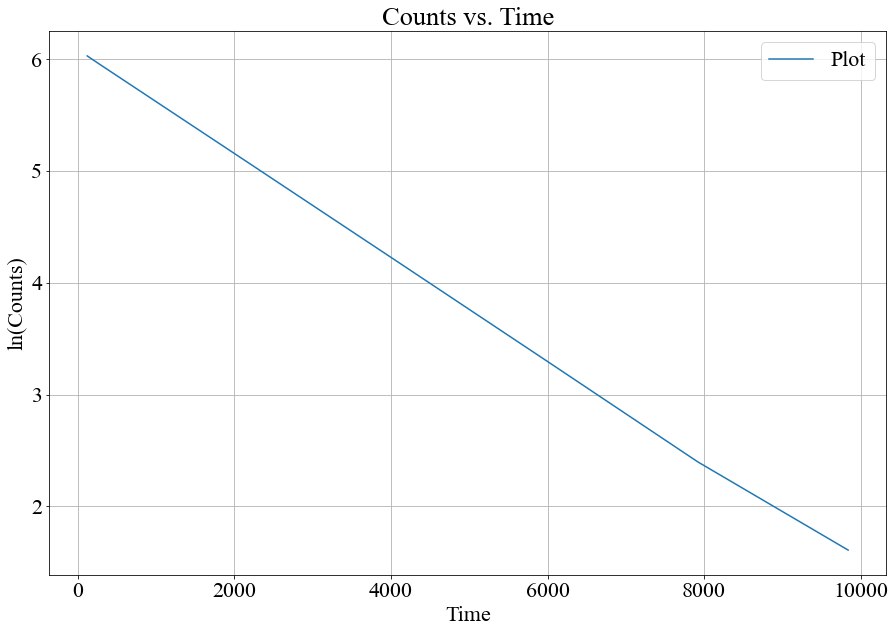

In [6]:
# --- Converting data ---

logcts = np.log(counts) 

# --- Plotting Data --- 

plt.plot(time, logcts, label = "Plot") 

plt.title("Counts vs. Time")
plt.ylabel("ln(Counts)") 
plt.xlabel("Time")
plt.legend()
plt.grid()
plt.show()

To plot the data, first **import the matplotlib pyplot module** , then **tell Jupyter to embed the plots in the notebook** by using the Jupyter cell magic: **<samp>%matplotlib inline</samp>**:
```python
import matplotlib.pyplot as plt
%matplotlib inline
```

<font color="blue"> Plot a graph of **<samp>logcts</samp>** against **<samp>t<samp>**, using the **matplotlib pyplot plot()** command, display the experimental data as points only (i.e. not connected by lines). Remember to label your axes and include a plot title. </font>

[pyplot plot() online help and options](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html)
    
Tip: after the last command in a cell the output of that command is printed. e.g. when adding a title or label to the plot you get a message that like **<samp>Text(0.5, 0, 'time (s)')</samp>**. To suppress these messages put a semi-colon immediately after the last command

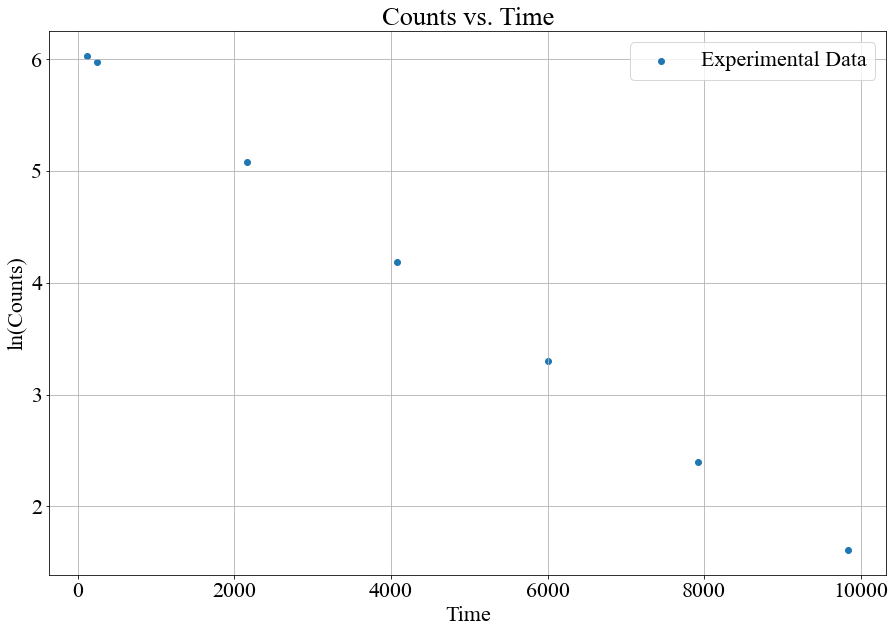

In [7]:
# --- Plotting Data --- 

plt.scatter( time, logcts, label = "Experimental Data") #scatter shows points of data 

plt.title("Counts vs. Time")
plt.ylabel("ln(Counts)") 
plt.xlabel("Time")
plt.legend()
plt.grid()
plt.show()


## 3) Simple straight line fitting

From the **<samp>scipy.optimize</samp>** library the function **<samp>curve_fit()</samp>**, may be used to determine the line of best fit for the data. 

The Scipy online documentation on **<samp>curve_fit()</samp>** can be found [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html).

The basic usage of **<samp>curve_fit()</samp>** is:
```python
from scipy.optimize import curve_fit

popt, pcov = curve_fit(func, xdata, ydata)
```

where **<samp>func</samp>** is the function to be fit to the provided data points.
There are additional options for including error bars on the data points which we will meet later.

**<samp>curve_fit()</samp>** returns two arrays: 
 * **<samp>popt</samp>** is an array with the optimum paramters for the fit function in the order in which the parameters are defined in the function. 
 * **<samp>pcov</samp>** is the covariance matrix, which contains information about the errors on the fit parameters. 
A tutorial will be given later on understanding the covariance matrix, but the **errors on the fit parameters are simply the square root of the diagonal elements**.

You will need to define the function that you are trying to fit to your data. 

<font color="blue"> Define the **<samp>fit</samp>** funcion (call it **"<samp>func</samp>"**) taking parameters **<samp>x</samp>**, **<samp>m</samp>** for the slope and **<samp>c</samp>** for the intercept (in that order) and have it return the value of $y=m \times x+c$ </font>

In [8]:
def func(x, m, c):
    return m*x + c #equation of a line y = mx + c 

<font color="blue"> Import the curve_fit function and use it to fit the straight-line function to the points. Print out the values of the best-fit slope and intercept **using scientific notation  to three decimal places** (Python: **<samp>f"{var:.3e}"</samp>**)</font>

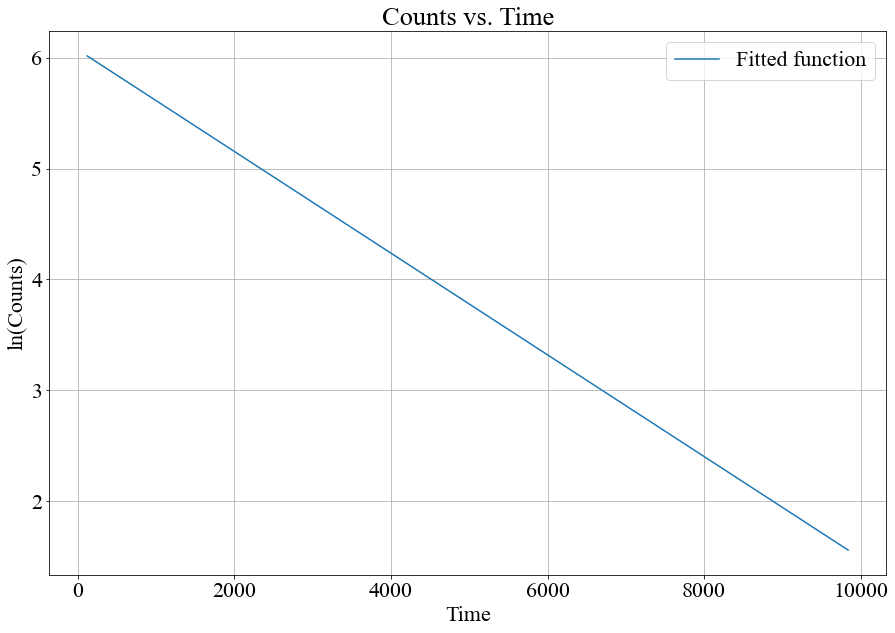

In [9]:
# --- Calculating Optimum Parameters and Covariance Matrix ---

popt1, pcov1 = curve_fit(func, time, logcts)

# --- Plotting the Data using straight line function --- 

plt.plot(time, func(time, popt1[0], popt1[1]), label='Fitted function') #using calculated parameters to plot best fit

plt.title("Counts vs. Time")
plt.ylabel("ln(Counts)") 
plt.xlabel("Time")
plt.legend()
plt.grid()
plt.show()

In [10]:
print(f"The slope is {popt1[0]:.3e}")
print(f"The intercept is {popt1[1]:.4}")

The slope is -4.586e-04
The intercept is 6.071


<font color="blue"> Plot the data points (as points) and the best-fit function (i.e. the fit function using the best-fit values returned by **<samp>curve_fit()</samp>**as a solid line overlaid.
It is always important to visually compare your fit with your data and check that it is reasonable. </font>

Note: you can pass the best-fit parameters to the fit function indivdually:
```python
yfit=func(x, popt[0], popt[1])
```
or use the Python variable expansion (**<samp>*args</samp>** notation):
```python
yfit=func(x, *popt)     #  expand and fill automatically
```

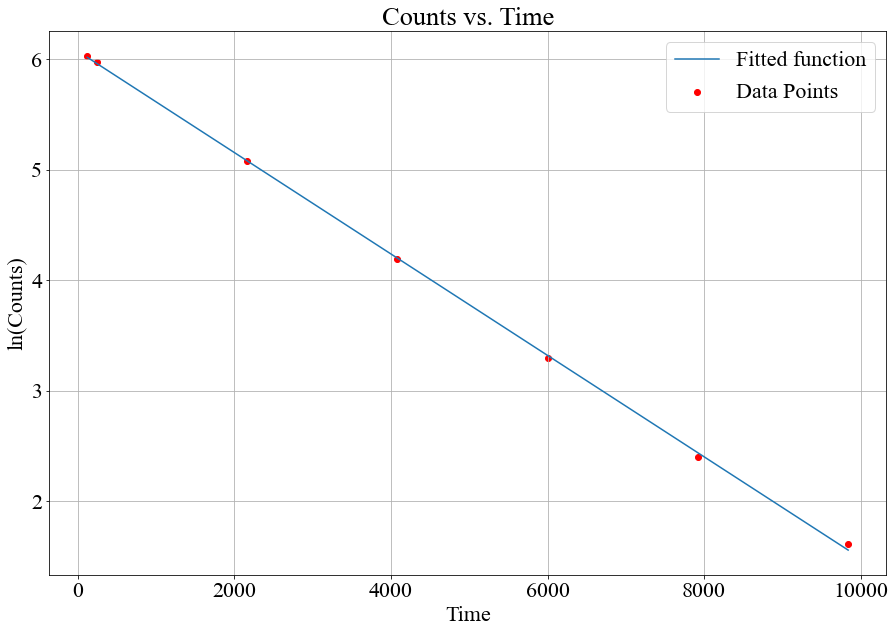

In [11]:
#  --- Plotting both data points and best fit --- 

plt.scatter(time, logcts, label = "Data Points", color='red') # --- data points ---
plt.plot(time, func(time, popt1[0], popt1[1]), label='Fitted function')# --- best fit plot ---

plt.title("Counts vs. Time")
plt.ylabel("ln(Counts)") 
plt.xlabel("Time")
plt.legend()
plt.grid()
plt.show()

<font color='blue'> Print the values of the best fit paramaters again but also include the errors on the fit parameters from the covariance matrix. (The errors are the square roots of the diagonal elements: the error on parameter 0 is **<samp>sqrt(pcov[0,0])</samp>** and similarly for parameter 1). Again, use scientific notation to three decimal places </font>

In [12]:
# --- defining errors --- 

sloperror = np.sqrt(pcov1[0, 0])
interror = np.sqrt(pcov1[1, 1])

# --- printing result --- 

print(f"The slope is {popt1[0]:.3e} +\-  {sloperror:.3e}")
print(f"The intercept is {popt1[1]:.3e} +\- {interror:.3e}")

The slope is -4.586e-04 +\-  3.495e-06
The intercept is 6.071e+00 +\- 1.946e-02


The law of radioactive decay can be expressed as 
$$N =N_{0} \exp(-\lambda t)$$

<font color='blue'> Use the slope of the line of best fit to determine values for $\lambda$ and $N_0$. </font>

Note: Python 3 has full unicode support so you can include symbols such as λ as variable names!


In [13]:
# Using the above expression we can detiermine that popt1[0] is lambda 
𝜆 = popt1[0]

# Using the above expression we can detiermine that popt1[1] is N_0 
N_0 = np.log(popt1[1])

<font color='blue'> Display the values of $\lambda$ and $N_0$ together with their uncertainties, using appropriate scale for each (ie. whether scientific notation or not) </font>
    
**Note on Propagation of Errors**: <br/>
since 
$$c=\ln N_0$$ 
and hence
$$N_0 = e^{c}$$
to get the error on $N_0$ we must propagate the uncertainty on the best-fit value of c (<samp>c_err</samp>) through the exponential which gives:
$$\sigma_{N_0} = N_0 \times \sigma_c$$

In [14]:
# Uncertainty for N is the value of N times the uncertainty on the intercept. 
N_0_err = N_0*interror

print(f"The value for 𝜆 is {𝜆:.3e} +\- {sloperror:.3e}")
print(f"The value for N_0 is {N_0:.3e} +\- {N_0_err:.3e}")

The value for 𝜆 is -4.586e-04 +\- 3.495e-06
The value for N_0 is 1.804e+00 +\- 3.509e-02


## 4) Straight line fitting including uncertainty on the data points

Assume in this experiment that the uncertainty associated with the time measurement is negligibly small whilst that associated with the number of counts is just the square root of the number of counts (Poisson statistics). You will have to determine the error associated with the natural logarithm of the counts using propogation of errors.

<font color ='blue'>Determine and plot the error bars on the log of the counts: 
    
Define a new variable (**<samp>logcts_err</samp>**) to be the uncertainty associated with the natural log of the counts and **plot <samp>logcts</samp> against <samp>t</samp> again but this time with error bars on the points**. Use the function: **<samp>plt.errorbar(x,y,yerr=logcts_err,fmt='.')</samp>**. Note: you can also use fmt='o' for bigger points.
    
Online help for [pyplot errorbar()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html) 
</font>

**Note on propagation of errors** 

To propagate an error through the natural log use:
$$\sigma_{\ln x}=\frac{\sigma_x}{x} = \frac{\sqrt{x}}{x} = \frac{1}{\sqrt{x}} = \frac{1}{\sigma_x}$$

In [21]:
# --- Propagating Error Through as Instructed --- 

𝜆_err = sloperror
N_0_prop_error = 1/np.sqrt(counts)

3.4949940247354685e-06


One of the optional parameters for the  **<samp>curvefit()</samp>** function is the uncertainties on "*y*".  

By specifying this you should improve the fit because it acts as a kind of weighting on each data point.

<font color = 'blue'>Repeat the fitting including the errors on *y*. </font>

To do this you will need to specify the array which stores the uncertainties (let's say it is called __<samp>errorY</samp>__) in the call to **<samp>curve_fit()</samp>** using the **<samp>sigma=</samp>** option:
```python
popt, pcov = curve_fit(func, x, y, sigma=errorY, absolute_sigma=True)
```
The option **<samp>absolute_sigma=True</samp>** specifies that the errors are true error bars and not just relative weights.

As before, the uncertainty on the fit parameters is obtained from the square root of the diagonal of the covariance matrix (**<samp>pcov</samp>**).

<font color = 'blue'> Plot the line of best fit against the data with error bars. Use the information obtained from this fit to redetermine the more accurate values of $\lambda$ and $N_0$ and the new uncertainties on them. Use different variable names for the best-fit parameters are errors to distinguish them from the previous ones.</font> 

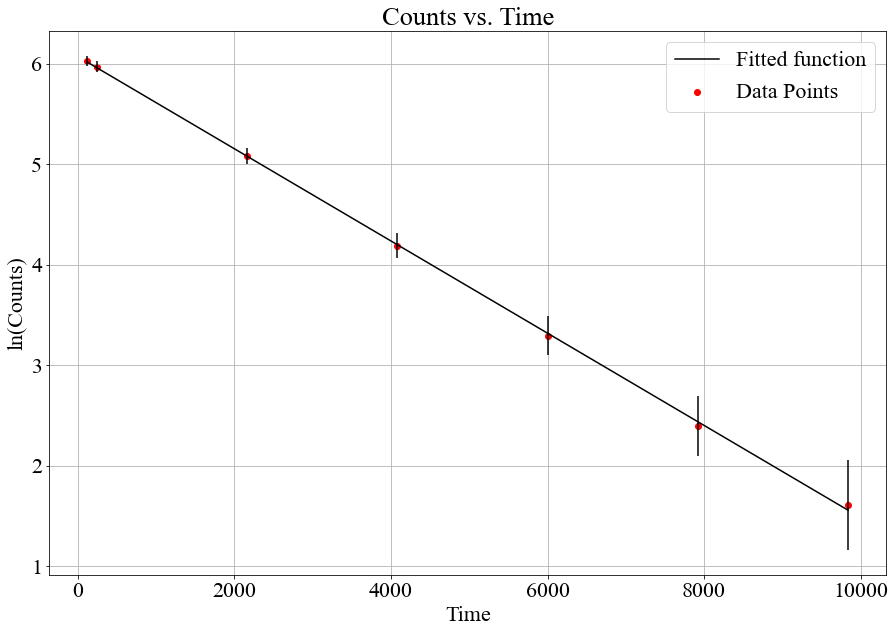

In [24]:
# --- Plotting the Data --- 

plt.scatter(time, logcts, label = "Data Points", color='red')
plt.plot(time, func(time, popt1[0], popt1[1]), label='Fitted function', color = 'black')
plt.errorbar(time, logcts, yerr =  N_0_prop_error, xerr = 𝜆_err, ls='none', color = 'black') 

plt.title("Counts vs. Time")
plt.ylabel("ln(Counts)") 
plt.xlabel("Time")
plt.legend()
plt.grid()
plt.show()

<font color='blue'> Compare the values (and errors) of $\lambda$ and $N_0$ obtained when error bars on the data points are included to the values obtained previously when uncertainties on the data points were not included. Comment on any differences you see and whether they are reasonable/expected. 
</font>

#### Comment on the fit results with and without error bars

When error bars are used it's clear to see that the uncertainty on the counts obtained greatly increases in conjuction with the amount of time passing as seen in the above plot. Without the presence of errorbars we would not be able to come to this conclusion. 


## 5) Concluding Remarks:

You could have done the whole exercise fitting to an exponential function directly. If you are interested you can try this and compare the results for N0 and $\lambda$ (and the uncertainties) with the ones you have already obtained.

Now you should be able to:
1. Read in a data file to a Python notebook
2. Plot the data including error bars
3. Fit a line of best fit to the data
4. Get errors on the slope and intercept.

**Make sure that you understand the components in the notebook!**
